# 拉格朗日插值

In [2]:
def lagrange(x,xt,yt):
    y = 0
    n=xt.size
    for i in range(n):
        t = 1
        for j in range(n):
            if i!=j:
                t = t*(x-xt[j])/(xt[i]-xt[j])
        y = y+t*yt[i]
    return y

In [3]:
import numpy as np
xt=np.array([0,2,3,12,8])
yt=np.array([1,2,4,10,10])
print(xt.size)

print("x=0: ",lagrange(0,xt,yt))
print("x=1", lagrange(1,xt,yt))
print(lagrange(2,xt,yt))
print(lagrange(3,xt,yt))
print(lagrange(4,xt,yt))

5
x=0:  1.0
x=1 0.749305555555556
2.0
4.0
6.155555555555555


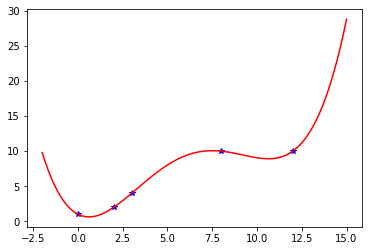

In [4]:
import matplotlib.pyplot as plt

x_range = np.linspace(-2, 15, 100)
plt.plot(xt,yt,'b*',x_range,lagrange(x_range,xt,yt),'r-')
plt.show()

# 牛顿差商

In [5]:
def coef(points): #函数嵌套迭代
    if len(points) == 1:
        return points[0, 1]
    return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

# 例3

In [6]:
def f(x):
    return 2*x**2-4*x+1

xi=np.array([0,1,2,3])
y=f(xi)
print(y)

[ 1 -1  1  7]


In [7]:
points = np.array([xi, y]).T
print(points)

[[ 0  1]
 [ 1 -1]
 [ 2  1]
 [ 3  7]]


In [8]:
coef_array = np.zeros(4)
for i in range(4):
        coef_array[i] = coef(points[:i+1])
print(coef_array)

[ 1. -2.  2.  0.]


In [9]:
px=Newton(points)

In [10]:
px(2.5)

3.5

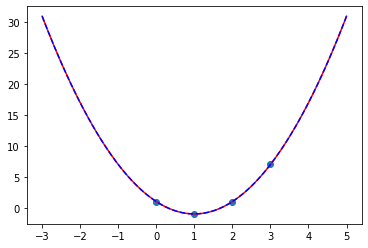

In [11]:
import matplotlib.pyplot as plt
x_range = np.linspace(-3, 5, 100)
plt.scatter(xi, y)
plt.plot(x_range,f(x_range),'r-')
plt.plot(x_range,px(x_range),'b--')
#plt.plot(x_range,lagrange(x_range,xi,y),'g--')
plt.show()

# 方程求解法的误差

In [12]:
def Vand(xi):
    n=xi.size
    VM=np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            VM[i,j]=xi[i]**j
    return VM

In [13]:
import numpy as np
def cond(A):  # inf-范数
    return abs(A).sum(axis=1).max() * abs(np.linalg.inv(A)).sum(axis=1).max()

In [14]:
xi=np.linspace(2, 10, 5)
print(xi)
print(Vand(xi))
print(cond(Vand(xi)))

[ 2.  4.  6.  8. 10.]
[[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
344441.0000000001


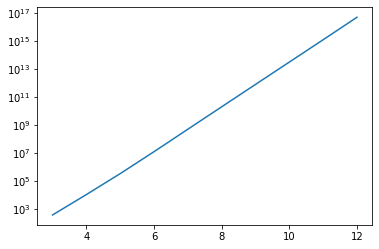

In [15]:
plotx=np.zeros(10)
ploty=np.zeros(10)
for i in range(10):
    plotx[i]=3+i
    n=3+i
    xi=np.linspace(2, 10, n)
    ploty[i]=cond(Vand(xi))
plt.plot(plotx,ploty)
plt.yscale('log')
plt.show()

# 龙格现象

In [16]:
def f(x):
    return 1/(1+12*x**2)

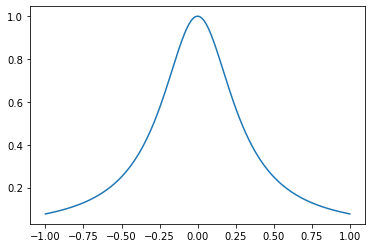

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xi=np.linspace(-1, 1, 200)

plt.plot(xi,f(xi))

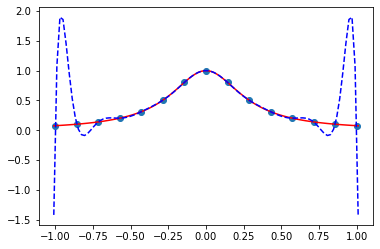

In [18]:
import numpy as np
import matplotlib.pyplot as plt

xi=np.linspace(-1, 1, 15)
yi=f(xi)
plt.scatter(xi, yi)
x_range=np.linspace(-1.01, 1.01, 100)
plt.plot(x_range,f(x_range),'r-')
#牛顿差商
points = np.array([xi, yi]).T
p=Newton(points)
plt.plot(x_range,p(x_range),'b--')
plt.show()